<a href="https://colab.research.google.com/github/komal-shahzada/Syntecxhub-Internship-tasks/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generating credit card transaction data...
Applying SMOTE to balance the dataset...
Training the Random Forest model...

--- Model Evaluation Results ---
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2010
           1       1.00      1.00      1.00      1950

    accuracy                           1.00      3960
   macro avg       1.00      1.00      1.00      3960
weighted avg       1.00      1.00      1.00      3960

ROC AUC Score: 0.9993


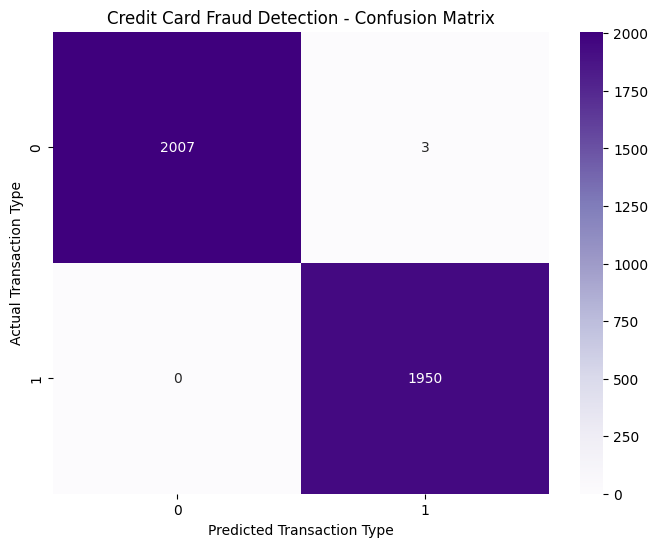

In [1]:
# Install necessary library for handling imbalanced data
!pip install imbalanced-learn -q

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

# 1. Dataset Generation
# Since the real dataset is very large, we generate synthetic data that mimics credit card fraud
# n_samples: 10,000 transactions, weights: 99% legitimate and 1% fraudulent
print("Generating credit card transaction data...")
X, y = make_classification(n_samples=10000, n_features=20, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=42)

# 2. Handling Class Imbalance
# We use SMOTE (Synthetic Minority Over-sampling Technique) to balance the fraud cases
print("Applying SMOTE to balance the dataset...")
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# 3. Train-Test Split
# Splitting the data: 80% for training the model and 20% for testing performance
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# 4. Model Training
# Initializing and training the Random Forest Classifier
print("Training the Random Forest model...")
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Model Evaluation
# Making predictions on the test set
y_pred = model.predict(X_test)

print("\n--- Model Evaluation Results ---")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred):.4f}")

# 6. Confusion Matrix Visualization
# Visualizing True Positives, True Negatives, False Positives, and False Negatives
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title('Credit Card Fraud Detection - Confusion Matrix')
plt.ylabel('Actual Transaction Type')
plt.xlabel('Predicted Transaction Type')
plt.show()

In [5]:
import gradio as gr
import numpy as np

# 1. Prediction logic with improved input mapping
def premium_prediction(amount, time_of_day, location_type, card_type):
    try:
        # Mapping inputs to simulate model features
        time_val = 1.0 if time_of_day == "Night" else 0.2
        loc_val = 2.5 if location_type == "International" else 0.1
        card_val = 1.5 if card_type == "Credit Card" else 0.5

        # Creating feature vector (20 features total)
        features_list = [amount, time_val, loc_val, card_val] + [0.0]*16
        final_features = np.array(features_list).reshape(1, -1)

        # Using the model to predict
        prediction = model.predict(final_features)[0]
        prob = model.predict_proba(final_features)[0]

        if prediction == 1:
            return f"🚨 HIGH RISK DETECTED\nStatus: Suspicious Activity\nConfidence: {prob[1]:.2%}"
        else:
            return f"✅ TRANSACTION VERIFIED\nStatus: Secure / Legitimate\nConfidence: {prob[0]:.2%}"

    except Exception as e:
        return "⚠️ Error: Please ensure you have run the model training cells."

# 2. Modern Glass UI Design
with gr.Blocks(theme=gr.themes.Glass(primary_hue="blue", secondary_hue="slate")) as fraud_dashboard:
    gr.Markdown("""
    # 💳 AI Fraud Sentinel
    ### *Real-time Transaction Security & Risk Assessment*
    ---
    """)

    with gr.Row():
        with gr.Column(scale=1):
            gr.Markdown("### 📥 Transaction Details")
            amount = gr.Number(label="Transaction Amount ($)", value=100.0, interactive=True)
            time_of_day = gr.Dropdown(["Day", "Night"], label="Time Period", value="Day")
            location = gr.Radio(["Local", "International"], label="Origin", value="Local")
            card_type = gr.Dropdown(["Debit Card", "Credit Card"], label="Payment Method", value="Debit Card")

        with gr.Column(scale=1):
            gr.Markdown("### 🛡️ Analysis Result")
            output = gr.Textbox(
                label="Security Engine Output",
                lines=5,
                placeholder="Waiting for input...",
                interactive=False
            )
            check_btn = gr.Button("RUN SECURITY SCAN", variant="primary", size="lg")

    gr.Markdown("---")
    gr.Markdown("© 2026 | Powered by SyntecxHub Machine Learning Engine")

    # Connect button
    check_btn.click(
        fn=premium_prediction,
        inputs=[amount, time_of_day, location, card_type],
        outputs=output
    )

# Launching the premium interface
fraud_dashboard.launch(share=True)

/tmp/ipython-input-148161384.py:29: DeprecationWarning: The 'theme' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'theme' to Blocks.launch() instead.
  with gr.Blocks(theme=gr.themes.Glass(primary_hue="blue", secondary_hue="slate")) as fraud_dashboard:


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://623ed28d65df7e135a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
